<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/ESAA_0906_%ED%95%B8%EC%A6%88%EC%98%A84%EC%9E%A5_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

핸즈온 4장 모델 훈련 p.157-203

# Chapter 4
## 4.1 선형 회귀
- 최적화 방법: 경사하강법
    - 배치 경사 하강법
    - 미니배치 경사 하강법
    - 확률적 경사 하강법
### 4.1.1 정규방정식 : 비용 함수를 최소화하는 $\beta$를 찾기 위한 해석적 방법
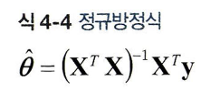

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.05177351],
       [2.84912916]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05177351],
       [9.75003183]])

In [8]:
import matplotlib.pyplot as plt

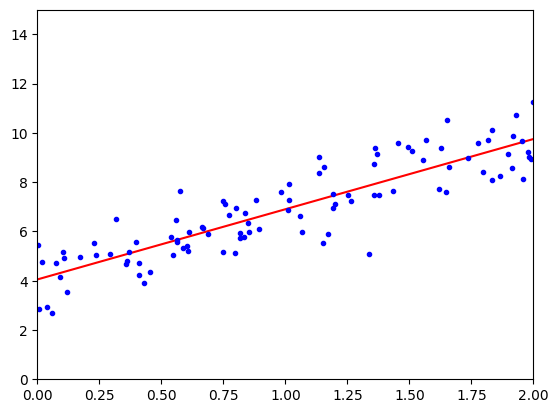

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.05177351]), array([[2.84912916]]))

In [12]:
lin_reg.predict(X_new)

array([[4.05177351],
       [9.75003183]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.05177351],
       [2.84912916]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.05177351],
       [2.84912916]])

### 4.1.2 계산 복잡도
- 역행렬 계산은 O(n^2.4)에서 O(n^3) 사이 -> 특성 수 두배로 늘어나면 계산 시간은 약 5.3(2^2.4)~8(2^3)배로 증가
- SVD방법은 일반적으로 $O(n^2)$ -> 특성 개수가 두배로 늘어나면 계산시간은 약 4배가 됨

## 4.2 경사 하강법
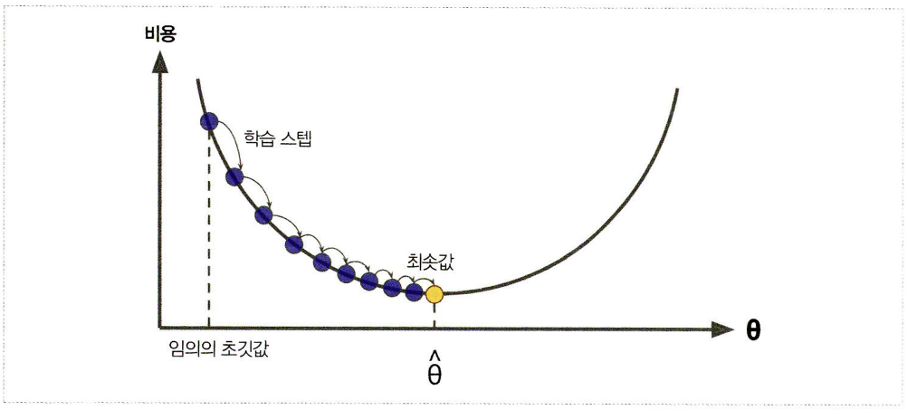
- 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합
- 비용함수 최소화를 위해 반복해서 파라미터 값 조정(<- gradient가 감소하는 방향 : 0이 되면 최솟값 도달)
- 무작위 초기화: 임의의 값으로 시작
- 학습률(learning rate): 스텝의 크기

### 4.2.1 배치 경사 하강법
- 전체 훈련세트 X에 대해 계산: 매 스텝에서 훈련 데이터 전체 사용
=> 훈련세트가 커지면 매우 느려짐
- 편도함수  
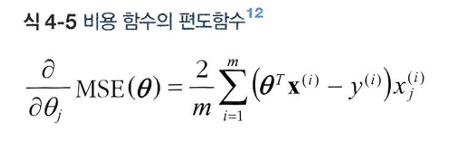


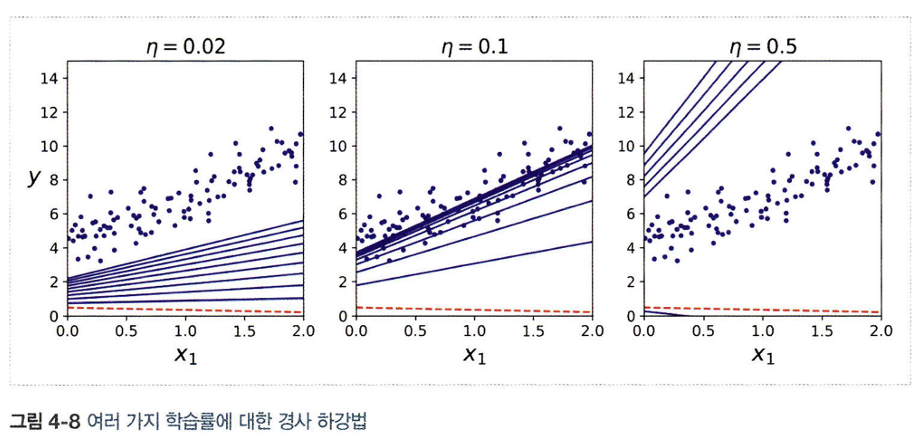

In [15]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.05177351],
       [2.84912916]])

### 4.2.2 확률적 경사 하강법
: 매 스텝에서 한 개의 샘플을 무작위로 선택 -> 그 하나의 샘플에 대한 gradient를 계산   
-> 매 반복에서 다뤄야할 데이터가 매우 적어 한번에 하나의 샘플을 처리 => 알고리즘이 빠름
- 확률적 -> 불안정  
 ->해결방법: 학습률을 점진적으로 감소 시킴 -> 담금질 기법
    - 매 반복에서 학습률을 결정하는 함수: 학습 스케줄
    - 너무 천천히 줄어들면 오랫동안 최솟값 주변 맴돌거나 너무 이른 훈련 중단 -> 지역 최솟값에 머무름
    - 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중단에 중단
- 각 반복: 에포크

In [17]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.08031518],
       [2.83237054]])

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.56295653]), array([0.76556097]))

### 4.2.3 미니배치 경사 하강법
: 각 스텝에서 미니배치(임의의 작은 샘플)에 대해 gradient 계산
- 장점: 행렬 연산에 최적화된 하드웨어 GPU를 사용해서 얻는 성능향상

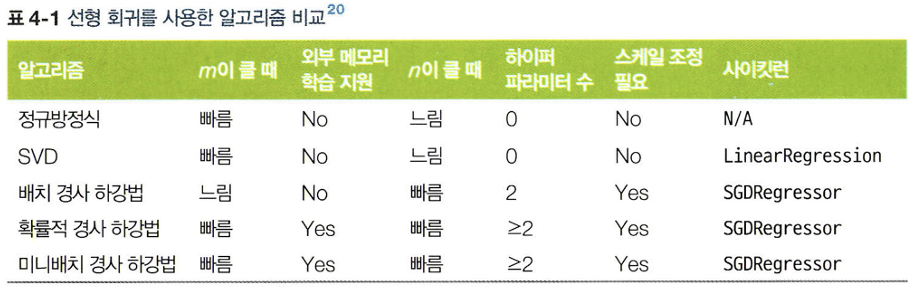

## 4.3 다항 회귀
: 비선형 데이터 학습

In [38]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.57673296])

In [40]:
X_poly[0]

array([0.57673296, 0.33262091])

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17320444]), array([[0.97056538, 0.43444068]]))

## 4.4 학습곡선
: 훈련세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄  
-> 단순 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련 시킴
- 과소적합: 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접
- 과대적합: 두 곡선 사이에 공간이 있음(훈련데이터에서의 모델 성능<<검증 데이터에서의 모델)
- 편향/분산 트레이드 오프: 모델의 복잡도가 커지면 통상적으로 분산은 늘어나고 편향은 줄어듦
    - 편향: 잘못된 가정으로 인함 ex. 실제: 2차 but 선형으로 가정
    - 분산: 훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문
    - 줄일 수 없는 오차: 데이터 자체에 있는 잡음으로 인해 발생

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='검증 세트')

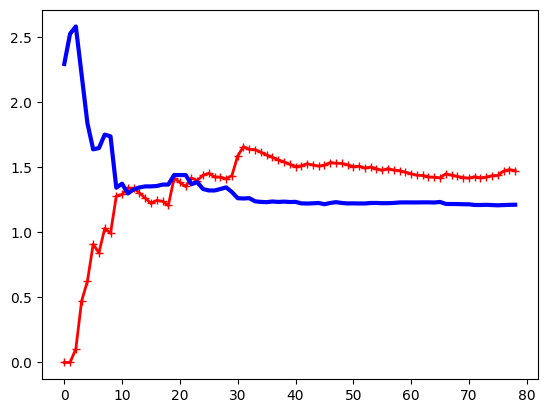

In [43]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

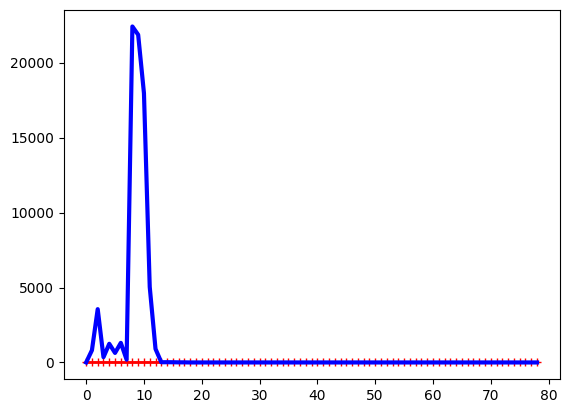

In [44]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

## 4.5 규제가 있는 선형 모델
-> 과대적합을 감소시키는 좋은 방법이 모델 규제
- 다항회귀: 다항식 차수 감소
- 선형회귀: 모델의 가중치 제한
    - 릿지
    - 라쏘
    - 엘라스틱넷

### 4.5.1 릿지 회귀
: 규제항이 비용함수에 추가 (훈련하는 동안만) / 훈련 끝나면 모델 성능을 규제 없는 성능 지표로 평가
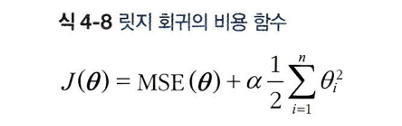

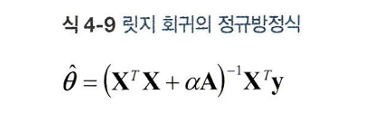

In [45]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.73582115]])

In [46]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.71150975])

### 4.5.2 라쏘 회귀
: 비용함수에 규제항을 더하지만, 좀 더 작은 $\alpha$값 사용
- 덜 중요한 특성의 가중치 제거하려 노력 (가중치 = 0)
- 자동으로 특성 선택 + 희소모델 생성
- 라쏘와의 차이점
    - 파라미터가 전역 최저점에 가까워질수록 gradient가 작아짐
    -  $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 더 가까워짐   
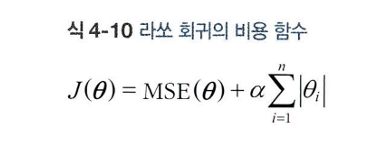

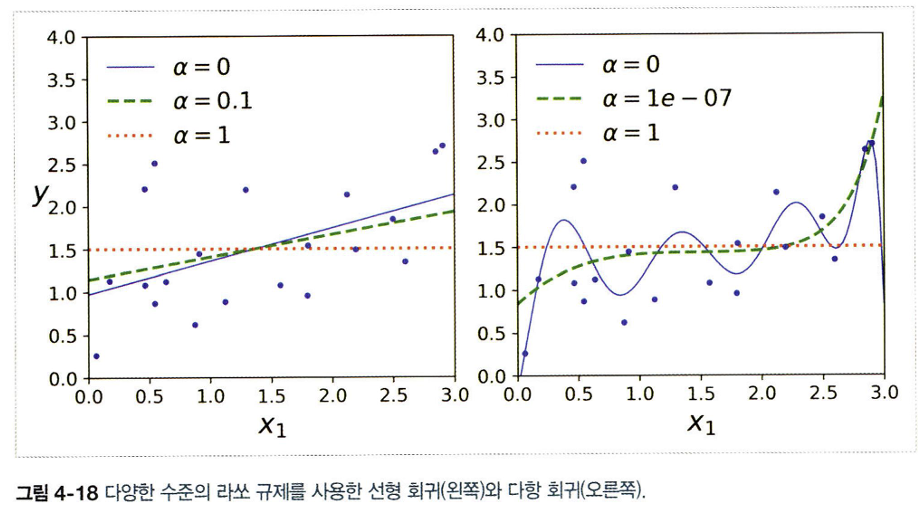

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.6846269])

### 4.5.3 엘라스틱넷
: 릿지회귀 + 라쏘회귀 절충한 모델
- 규제항: 릿지&회귀의 규제항을 더해서 사용
- 혼합 정도: 혼합비율 r을 사용해 조절
    - r=0: 릿지와 동일
    - r=1: 라쏘와 동일   
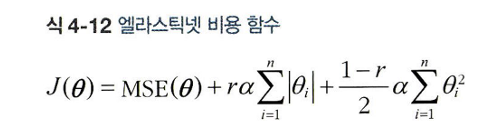


<선형회귀 요약>
- 릿지가 기본
- 기본 특성이 몇개 뿐 -> 라쏘나 엘라스틱넷
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관 -> 라쏘<엘라스틱넷


In [48]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.68921593])

### 4.5.4 조기 종료
: 검증 에러가 최솟값에 도달하면 바로 훈련 중지

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [56]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol=None, warm_start = True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 4.6 로지스틱 회귀
### 4.6.1 확률 추정
- 로지스틱 회귀: 입력 특성의 가중치 합을 계산 -> 편향을 더함
- 로지스틱: 0과 1 사이의 값을 출력하는 시그모이드 함수
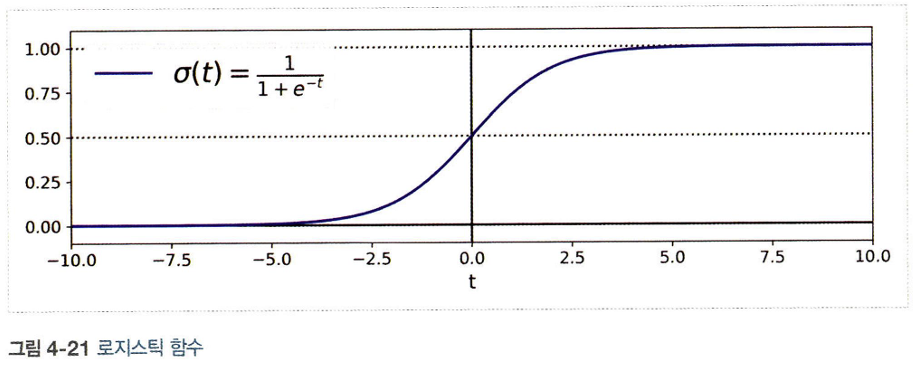

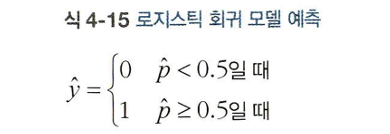

### 4.6.2 훈련과 비용 함수
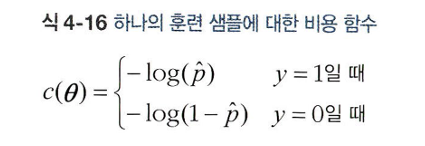

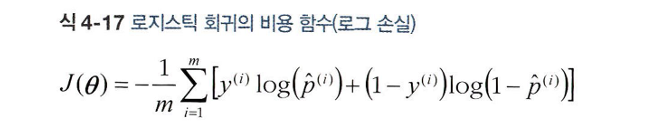

### 4.6.3 결정 경계

In [57]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [59]:
X = iris['data'][:,3:]  # 꽃잎의 너비
y = (iris['target']==2).astype(int)  # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

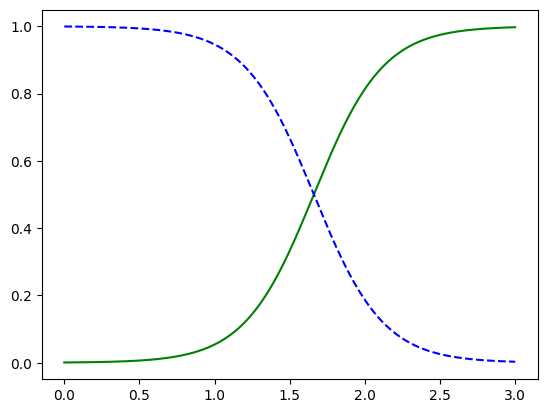

In [61]:
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label = 'Not Iris virginica')

In [62]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀
- 샘플 x에 대해 소프트맥스 회귀모델이 각 클래스 k에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률 추정
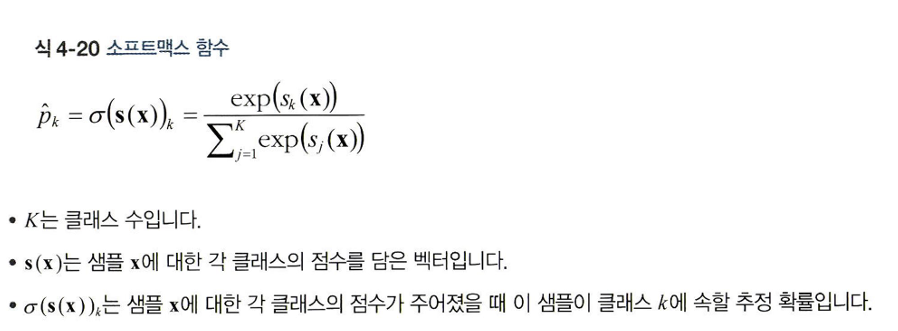

In [64]:
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [65]:
softmax_reg.predict([[5,2]])

array([2])

In [66]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])